In [1]:
from konlpy.tag import Okt
from collections import Counter
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import matplotlib 
from IPython.display import set_matplotlib_formats
import numpy as np
from PIL import Image

In [2]:
# 토큰 str 불러오기
fr = open('../data/bluehouse_token.txt','r',encoding='CP949')
lists = fr.readlines()
fr.close()

In [3]:
# 토큰별 태그와 함께 튜플 리스트로 저장
okt = Okt()
morphs = []

for sentence in lists:
    morphs.append(okt.pos(sentence))

In [13]:
# 부적절한 토큰 제외하고 리스트로 저장
noun_adj_list = []

for tuples in morphs:
    for word, tag in tuples:
        if tag in ['Noun'] and ("대한" not in word) and ("적용" not in word) and ("및" not in word) and ("요청" not in word) \
        and ("위" not in word) and ("관련" not in word) and ("수" not in word) and ("것" not in word) and ("저" not in word) \
        and ("입" not in word) and ("재" not in word) and ("등" not in word) and ("무" not in word) and ("제" not in word) \
        and ("시오" not in word) and ("이" not in word) and ("중" not in word) and ("더" not in word) and ("피" not in word) \
        and ("비" not in word) and ("자" not in word) and ("고" not in word) and ("대해" not in word) and ("를" not in word) \
        and ("왜" not in word) and ("요구" not in word) and ("의" not in word) and ("위" not in word) and ("을" not in word) \
        and ("청" not in word) and ("한" not in word) and ("자" not in word) and ("단" not in word) and ("제" not in word) \
        and ("제" not in word) and ("층" not in word) and ("개선" not in word):
            noun_adj_list.append(word)

In [14]:
# 최종 토큰 리스트 확인
noun_adj_list[:10]

['국민', '속', '국', '공립', '육아휴직', '거부', '사용', '강화', '백신', '미접']

In [15]:
# 토큰별 출연 횟수 dict 저장
count = Counter(noun_adj_list)
word_count = dict(count.most_common())

In [16]:
# 토큰별 출연 횟수 dict 확인
word_count

{'백신': 58,
 '코로나': 37,
 '접종': 34,
 '처벌': 32,
 '후': 30,
 '국민': 25,
 '사건': 25,
 '촉구': 21,
 '차': 20,
 '반대': 18,
 '사망': 17,
 '패스': 17,
 '법': 15,
 '정부': 13,
 '내': 13,
 '강력': 13,
 '세': 13,
 '보호': 13,
 '불법': 12,
 '주택': 12,
 '아파트': 12,
 '조사': 12,
 '아버지': 12,
 '사기': 11,
 '병원': 11,
 '검사': 11,
 '사업': 11,
 '상공': 10,
 '대책': 10,
 '대출': 10,
 '부작용': 10,
 '공인': 10,
 '인천': 10,
 '개정': 10,
 '폭행': 9,
 '직원': 9,
 '국가': 9,
 '해결': 9,
 '관리': 9,
 '기준': 9,
 '여성': 8,
 '괴롭힘': 8,
 '행정': 8,
 '금': 8,
 '대통령': 8,
 '백혈병': 8,
 '정책': 8,
 '경찰': 8,
 '주': 8,
 '강화': 7,
 '치료': 7,
 '방역': 7,
 '엄마': 7,
 '사회': 7,
 '지역': 7,
 '아동': 7,
 '관': 7,
 '어머니': 7,
 '폐지': 7,
 '급성': 7,
 '보험': 7,
 '엄벌': 7,
 '학대': 7,
 '사용': 6,
 '경기도': 6,
 '해': 6,
 '직장': 6,
 '시험': 6,
 '법인': 6,
 '센터': 6,
 '건설': 6,
 '처리': 6,
 '철회': 6,
 '조속': 6,
 '범죄': 6,
 '살인': 6,
 '안전': 6,
 '학교': 6,
 '인권': 6,
 '못': 6,
 '미접': 5,
 '검토': 5,
 '우리': 5,
 '부족': 5,
 '좀': 5,
 '길': 5,
 '마련': 5,
 '용': 5,
 '시기': 5,
 '교사': 5,
 '지원': 5,
 '아들': 5,
 '학폭': 5,
 '처우': 5,
 '장애인': 5,
 '종부세': 5,
 '주민': 5

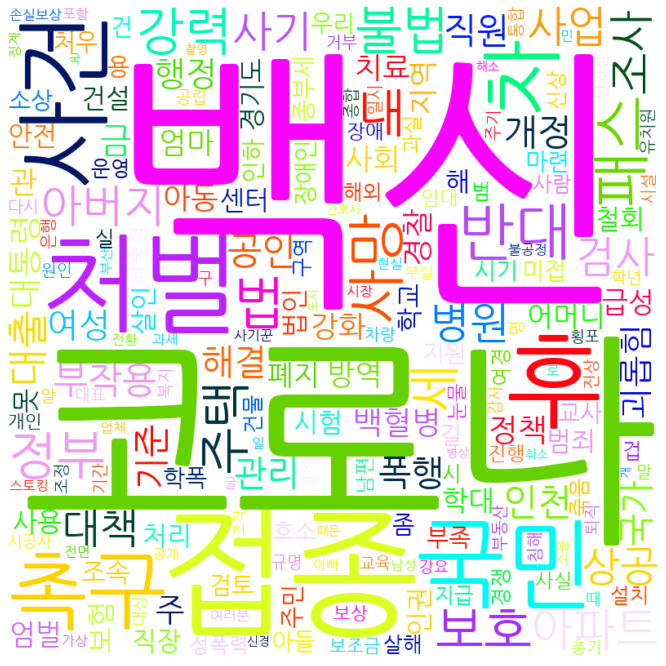

In [17]:
# 워드클라우드 생성
wordcloud = WordCloud(background_color="white", font_path='../data/NanumGothic.ttf',
                     colormap='gist_ncar', width=800, height=800)

wordcloud = wordcloud.generate_from_frequencies(word_count)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
# 워드클라우드 png파일로 저장
wordcloud.to_file("../data/bluehouse_wordcloud.png")